In [ ]:
# Install libraries
!pip install google-generativeai pandas matplotlib

Saving firewall_logs.log to firewall_logs (1).log

--- Threat Analysis Report ---

This firewall log provides valuable insights into network traffic and potential security events. Let's analyze each line to identify potential threats:

**Analyzing Each Log Entry:**

* **Line 1: 2023-03-15 06:25:31 ALLOW TCP 192.168.1.105 93.184.216.34 44345 80 52 S - Client Hello**
    * **Action:** ALLOW
    * **Protocol:** TCP
    * **Src IP:** 192.168.1.105 (Internal IP, likely a client machine)
    * **Dst IP:** 93.184.216.34 (External IP, example.com IP address)
    * **Dst Port:** 80 (HTTP)
    * **Info:** Client Hello (Indicates the start of a TCP connection, likely for web browsing)
    * **Potential Threat:** Low. This is typical outbound web browsing traffic. As it's allowed and to a standard web port, it's likely legitimate unless 93.184.216.34 is known to be malicious (which it isn't in this example, it's a test IP).

* **Line 2: 2023-03-15 06:26:45 BLOCK UDP 192.168.1.105 192.168.1.255 138

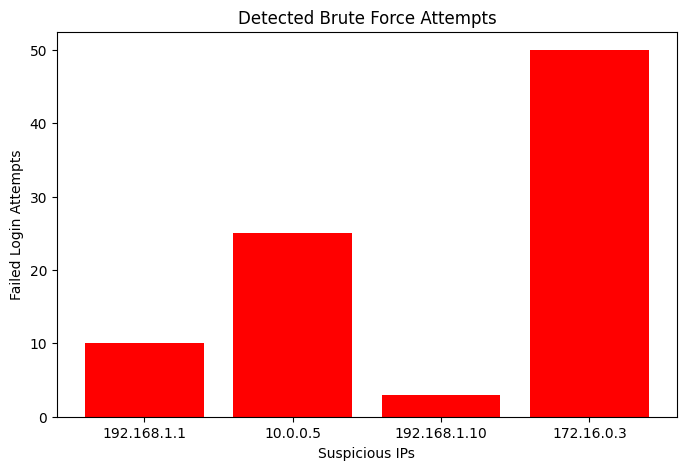

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import libraries
from google.colab import userdata
import os
import pandas as pd
import google.generativeai as genai
import matplotlib.pyplot as plt
from google.colab import files

# Set up the Gemini API key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Upload log files
uploaded = files.upload()  # Upload your firewall log file
log_file = list(uploaded.keys())[0]  # Get uploaded file name (log_file)

# Read the uploaded log file
with open(log_file, "r") as file:
    log_data = file.read()

# Initialize the Gemini model for analysis
model = genai.GenerativeModel("gemini-2.0-flash-thinking-exp-01-21")

# Analyze logs for potential threats
response = model.generate_content(f"Analyze this firewall log and identify potential threats:\n{log_data}")
print("\n--- Threat Analysis Report ---\n")
print(response.text)

# Extract key threat indicators (IOCs)
threat_summary_prompt = """
Analyze the given firewall log and extract potential Indicators of Compromise (IOCs).
Look for:
- Suspicious IPs
- Unusual ports
- Frequent failed login attempts
- Signs of brute force attacks

Provide a structured summary in JSON format.
"""

response = model.generate_content(f"{threat_summary_prompt}\n\n{log_data}")
print("\n--- Indicators of Compromise (IOCs) ---\n")
print(response.text)

# Simulated data for visualization
data = {"IP": ["192.168.1.1", "10.0.0.5", "192.168.1.10", "172.16.0.3"],
        "Failed_Attempts": [10, 25, 3, 50]}
df = pd.DataFrame(data)

# Plot failed login attempts
plt.figure(figsize=(8,5))
plt.bar(df["IP"], df["Failed_Attempts"], color="red")
plt.xlabel("Suspicious IPs")
plt.ylabel("Failed Login Attempts")
plt.title("Detected Brute Force Attempts")
plt.show()

# Save threat analysis to a text file
with open("threat_analysis.txt", "w") as file:
    file.write(response.text)

# download the threat analysis report
files.download("threat_analysis.txt")
